# Plot error threshold

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial

# Function to calculate logical error rate P_L
def logical_error_rate(d, P_e):
    d_e = (d + 1) // 2
    comb = factorial(d) / (factorial(d_e - 1) * factorial(d_e))
    P_L = d * comb * (P_e ** d_e)
    return P_L

# Code distances to consider
code_distances = [3,  7,  11, 15, 19, 23, 27, 30]

# Physical error rates to consider
P_e_values = np.linspace(0.0001, 0.5, 100)

# Physical error rates to consider
P_e_values = np.logspace(-8, 1, 100)  # Logarithmic scale from 0.001 to 0.1

# Plotting the results
plt.figure(figsize=(10, 6))

for d in code_distances:
    P_L_values = [logical_error_rate(d, P_e) for P_e in P_e_values]
    plt.plot(P_e_values, P_L_values, label=f'd = {d}')

plt.xscale('log')
plt.yscale('log')  # Logical error rate is typically plotted on a logarithmic scale
plt.xlabel(r'Physical Error Rate ($P_e$)')
plt.ylabel(r'Logical Error Rate ($P_L$)')
plt.title('Logical Error Rate vs. Physical Error Rate for Different Code Distances (Log-Log Scale)')
plt.legend()
plt.grid(True)
plt.savefig("SurfaceEstimate.png")
plt.show()


# Plot binomial distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 5000
p = 0.01

# Binomial distribution
k = np.arange(0, n+1)
probabilities = binom.pmf(k, n, p)

plt.figure(figsize=(10, 6))
plt.stem(k, probabilities)
plt.xlim(0,2*n*p)
plt.xlabel('Number of Errors')
plt.ylabel('Probability')
plt.title('Binomial Distribution of the number of error (n=50, p=0.01)')
plt.grid(True)
plt.savefig("Binomial")
plt.show()

# Histogram of 2 qubit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed probability value
p = 0.85

# Calculate probabilities for the first set of equations
P1_0 = (1-p)**4 + p**2 * (1-p)**2 + 2 * p**3 * (1-p)
P1_1 = 3*p * (1-p)**3 + 3*p**2 * (1-p)**2 + p**3 * (1-p) + p**4
P1_2 = p * (1-p)**3 + 2 * p**2 * (1-p)**2 + p**3 * (1-p)

# Calculate probabilities for the second set of equations
P2_0 = (2*p**2 - 2*p + 1)**2
P2_1 = 2 * (2*p - 2*p**2) * (2*p**2 - 2*p + 1)
P2_2 = (2*p - 2*p**2)**2

# Data for histograms
values = np.array([0, 1, 2])
P1_values = [P1_0, P1_1, P1_2]
P2_values = [P2_0, P2_1, P2_2]

# Bar width
bar_width = 0.25

# Plot the histograms
plt.figure(figsize=(10, 6))

# Histogram for the first set of probabilities
plt.bar(values - bar_width/2, P1_values, bar_width, label='After CNOT propagation', color='blue', edgecolor='black')

# Histogram for the second set of probabilities
plt.bar(values + bar_width/2, P2_values, bar_width, label='Before CNOT propagation', color='red', edgecolor='black')

plt.xlabel('Number of Bitflip errors at T=2',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.title('Histogram of Two Probability Distributions for p=0.85',fontsize=16)
plt.xticks(values)
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig("2QubitDistribution.png")
plt.show()


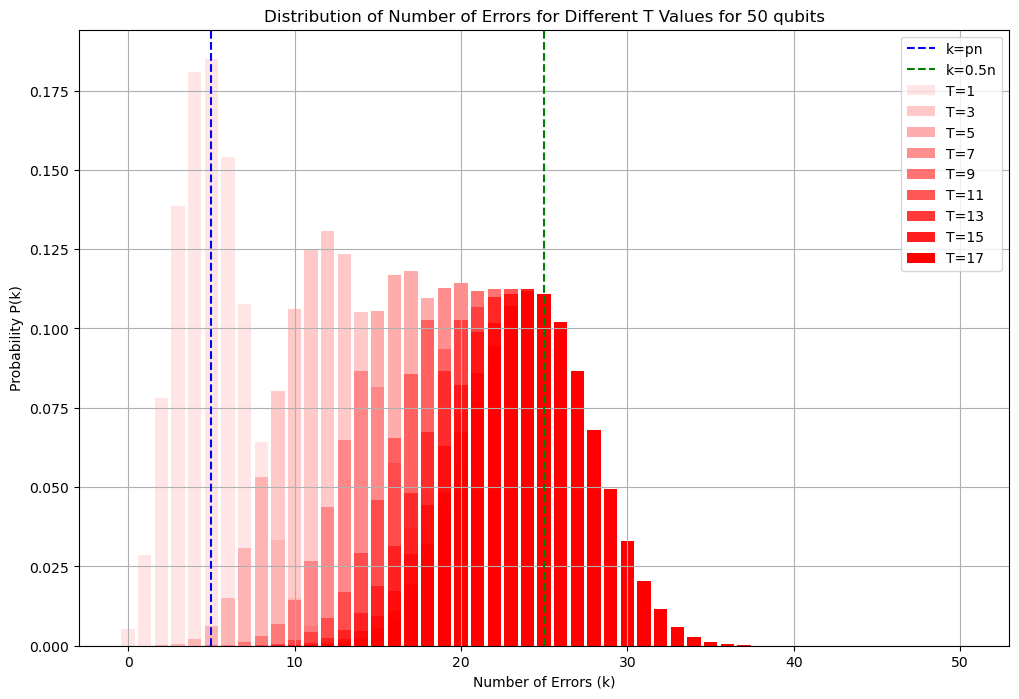

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

# Define the parameters
n = 50
T_values = [1, 3, 5, 7, 9, 11,13,15,17]
p = 0.1  # Assuming a bit-flip probability

# Function to calculate P(even) and P(odd)
def P_even_odd(T, p):
    P_even = sum(binom(T, 2*k) * p**(2*k) * (1-p)**(T-2*k) for k in range(T//2 + 1))
    P_odd = sum(binom(T, 2*k+1) * p**(2*k+1) * (1-p)**(T-2*k-1) for k in range((T+1)//2))
    return P_even, P_odd

# Function to calculate the distribution P(k)
def P_k(n, T, p):
    P_even, P_odd = P_even_odd(T, p)
    P_k_values = [binom(n, k) * (P_even**(n-k)) * (P_odd**k) for k in range(n+1)]
    return P_k_values

# Plotting the histograms
plt.figure(figsize=(12, 8))

# Define the base color and opacity increment
base_color = 'red'
opacities = np.linspace(0.1, 1.0, len(T_values))

for T, opacity in zip(T_values, opacities):
    P_k_values = P_k(n, T, p)
    plt.bar(range(n+1), P_k_values, alpha=opacity, color=base_color, label=f'T={T}')
# Plot the horizontal dashed line at x = p * n
plt.axvline(x=p*n, color='blue', linestyle='--', label="k=pn")
plt.axvline(x=0.5*n, color='green', linestyle='--', label="k=0.5n")


plt.xlabel('Number of Errors (k)')
plt.ylabel('Probability P(k)')
plt.title('Distribution of Number of Errors for Different T Values for 50 qubits')
plt.legend()
plt.grid(True)
plt.savefig("50QubitNoCNOT.png")
plt.show()


In [1]:
%matplotlib inline

In [2]:
from CNOTCircuit import CNOTCircuit
from matplotlib import pyplot as plt

10
20
30
40
50
60
70
80
90
100
110
10
20
30
40
50
60
70
80
90
100
110
10
20
30
40
50
60
70
80
90
100
110


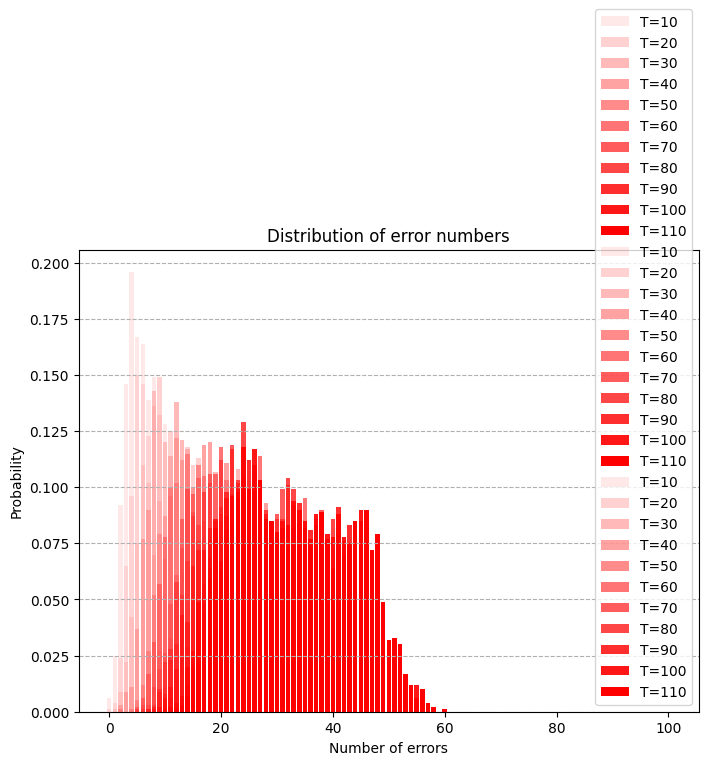

In [3]:
Tlist=[10,20,30,40,50,60,70,80,90,100,110]
plt.figure(figsize=(8, 6))
expectation_list_60=[]
entropy_list_60=[]
std_list_60=[]
expectation_list_80=[]
entropy_list_80=[]
std_list_80=[]
expectation_list_100=[]
entropy_list_100=[]
std_list_100=[]


for T in Tlist:
    print(T)
    circuit = CNOTCircuit(60, T, 0.01)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(1000)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list_60.append(tmpexp)
    entropy_list_60.append(circuit.calculate_entropy())
    std_list_60.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())
    # Normalize T to a value between 0 and 1 for the alpha
    alpha = T / max(Tlist)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'T={T}')


for T in Tlist:
    print(T)
    circuit = CNOTCircuit(80, T, 0.01)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(1000)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list_80.append(tmpexp)
    entropy_list_80.append(circuit.calculate_entropy())
    std_list_80.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())
    # Normalize T to a value between 0 and 1 for the alpha
    alpha = T / max(Tlist)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'T={T}')



for T in Tlist:
    print(T)
    circuit = CNOTCircuit(100, T, 0.01)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(1000)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list_100.append(tmpexp)
    entropy_list_100.append(circuit.calculate_entropy())
    std_list_100.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())
    # Normalize T to a value between 0 and 1 for the alpha
    alpha = T / max(Tlist)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'T={T}')



plt.grid(axis='y', linestyle='--', alpha=T/max(Tlist))
plt.xlabel('Number of errors')
plt.ylabel('Probability')
plt.title('Distribution of error numbers')
plt.legend()
plt.show()

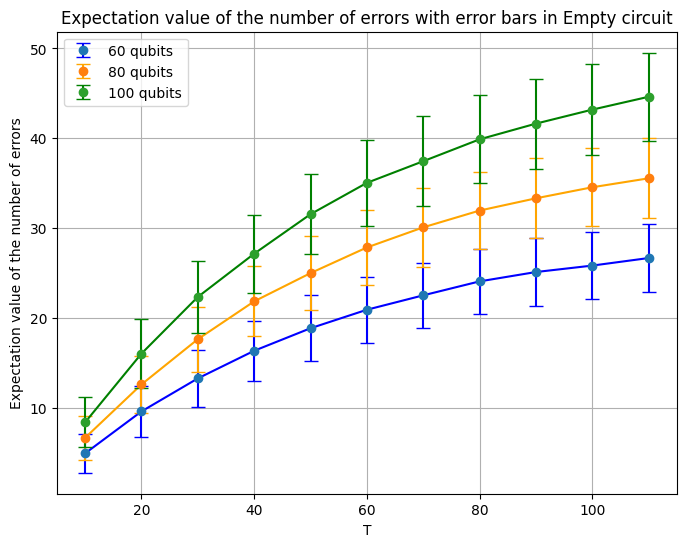

In [13]:

plt.figure(figsize=(8, 6))

# Plot the expectation values with error bars
plt.errorbar(Tlist, expectation_list_60, yerr=std_list_60, fmt='o', ecolor='blue', capsize=5, label='60 qubits')
plt.plot(Tlist, expectation_list_60, color='blue')

plt.errorbar(Tlist, expectation_list_80, yerr=std_list_80, fmt='o', ecolor='orange', capsize=5, label='80 qubits')
plt.plot(Tlist, expectation_list_80, color='orange')
plt.errorbar(Tlist, expectation_list_100, yerr=std_list_100, fmt='o', ecolor='green', capsize=5, label='100 qubits')
plt.plot(Tlist, expectation_list_100, color='green')
plt.xlabel('T')
plt.ylabel('Expectation value of the number of errors')
plt.title('Expectation value of the number of errors with error bars in Empty circuit')
plt.legend()
plt.grid(True)
plt.savefig('expErrorEmpty.png', dpi=300)  # 'my_plot.png' is the filename, 'dpi=300' sets the resolution

plt.show()

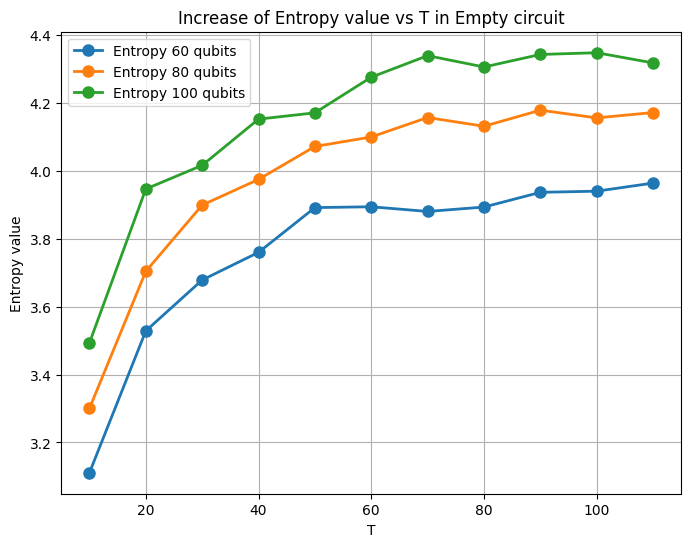

In [11]:

plt.figure(figsize=(8, 6))

# Plot the expectation values with error bars

plt.plot(Tlist, entropy_list_60, marker='o', linestyle='-', markersize=8, linewidth=2, label='Entropy 60 qubits')

plt.plot(Tlist, entropy_list_80, marker='o', linestyle='-', markersize=8, linewidth=2, label='Entropy 80 qubits')

plt.plot(Tlist, entropy_list_100, marker='o', linestyle='-', markersize=8, linewidth=2, label='Entropy 100 qubits')


plt.xlabel('T')
plt.ylabel('Entropy value')
plt.title('Increase of Entropy value vs T in Empty circuit')
plt.legend()
plt.grid(True)
plt.savefig('entropy.png', dpi=300)  # 'my_plot.png' is the filename, 'dpi=300' sets the resolution

plt.show()

In [1]:
from CNOTCircuit import CNOTCircuit,transversal_circuit



newcircuit=transversal_circuit(10, 5, 3, 0.01)
newcircuit.construct_qiskit_circuit()
newcircuit.show_circuit()

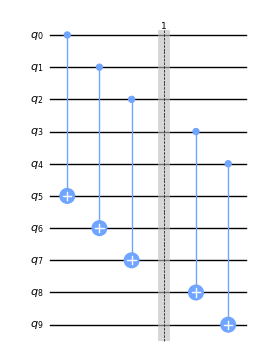

In [2]:
newcircuit._qiskitcircuit.draw(output='mpl',scale=0.5)

In [4]:
newcircuit._gateList

[(0, 5, 0), (1, 7, 0), (2, 9, 0), (3, 8, 1), (4, 10, 1)]

In [14]:
from CNOTCircuit import CNOTCircuit,transversal_circuit

gate_per_t=[100,300]
plt.figure(figsize=(8, 6))
expectation_list=[]
std_list=[]

circuit0=CNOTCircuit(200,40,0.0001)
circuit0.construct_all()
dis0=circuit0.calculate_distribution_sample(10000)
keys = list(dis0.keys())
values = list(dis0.values())

refexp,refstd=circuit0.get_expectation_and_std()


plt.bar(keys, values, color=(1, 1, 0, 1), label="Reference")


for gnum in gate_per_t:
    print(gnum)
    circuit=transversal_circuit(1000, 500, gnum, 0.0001)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(10000)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list.append(tmpexp)
    std_list.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())

    # Normalize T to a value between 0 and 1 for the alpha
    alpha = gnum / max(gate_per_t)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'gnum={gnum}')
    plt.xlabel('Number of errors')
    plt.ylabel('Probability')
    plt.title('Distribution of error numbers')
    plt.grid(axis='y', linestyle='--')

plt.legend()
plt.show()

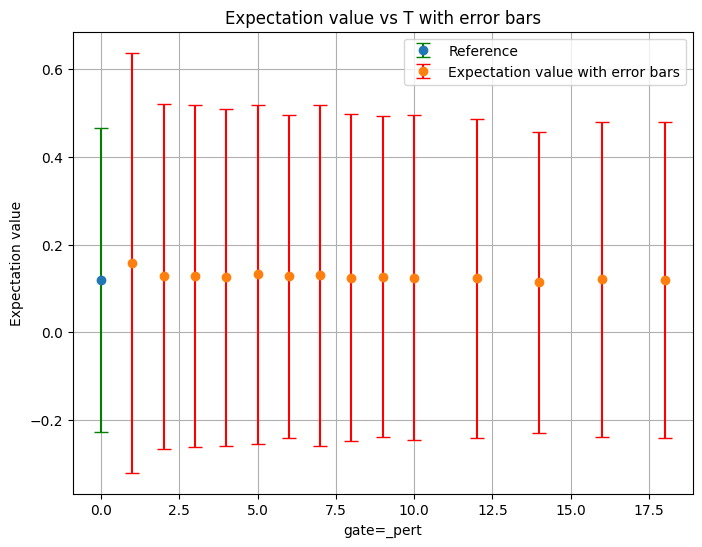

In [13]:

plt.figure(figsize=(8, 6))



plt.errorbar(0,refexp,refstd,fmt='o', ecolor='green', capsize=5, label='Reference')
# Plot the expectation values with error bars
plt.errorbar(gate_per_t, expectation_list, yerr=std_list, fmt='o', ecolor='red', capsize=5, label='Expectation value with error bars')

plt.xlabel('gate=_pert')
plt.ylabel('Expectation value')
plt.title('Expectation value vs T with error bars')
plt.legend()
plt.grid(True)

plt.show()

In [1]:
from CNOTCircuit import CNOTCircuit,transversal_circuit,random_circuit



circuit=random_circuit(20,10,3,0.01)
circuit.construct_all()
circuit.show_circuit()
circuit._qiskitcircuit.draw(output='mpl',scale=0.5)

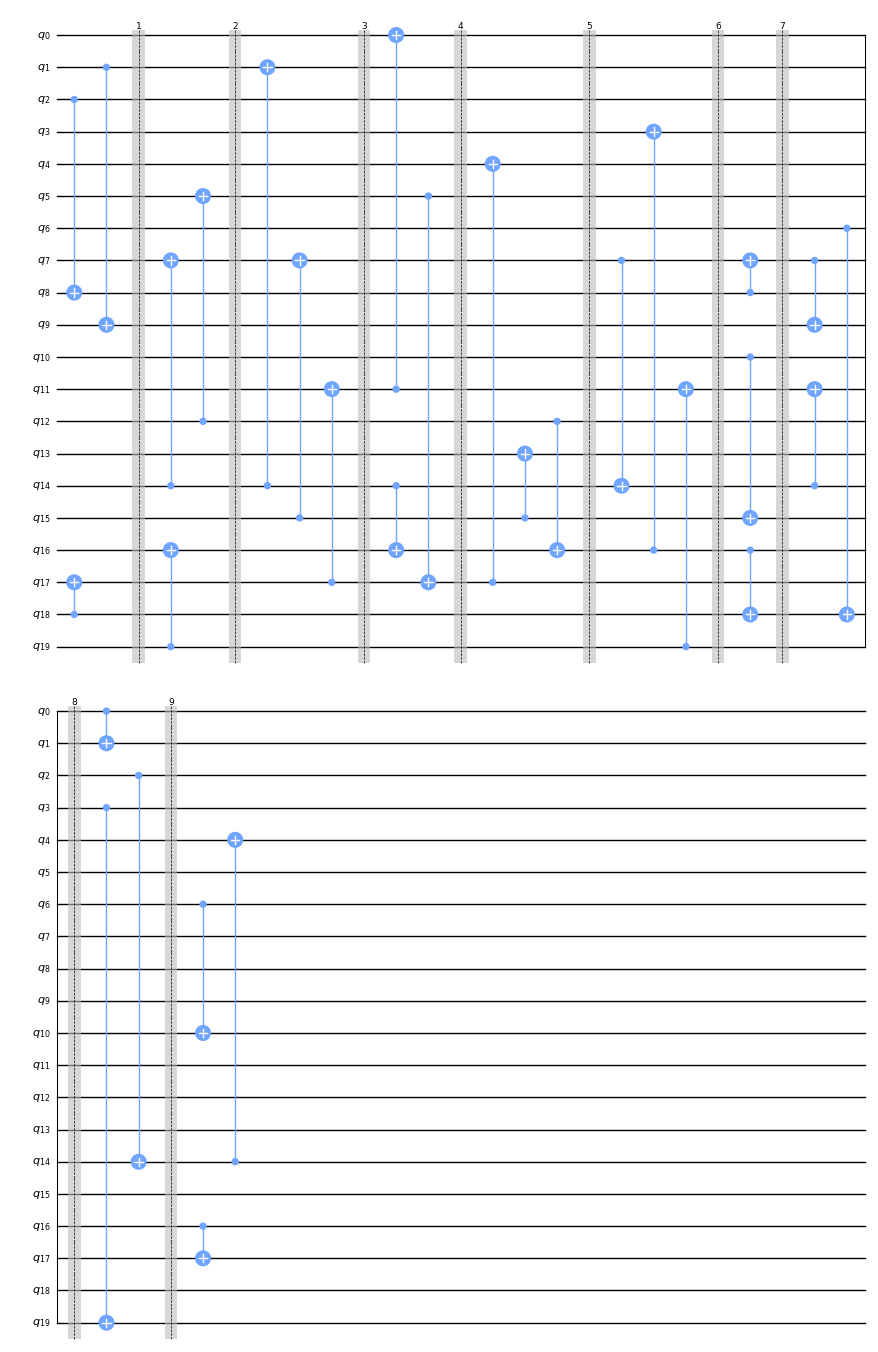

In [3]:
circuit._qiskitcircuit.draw(output='mpl',scale=0.5)


1
2
3
4
5
6


IndexError: list index out of range

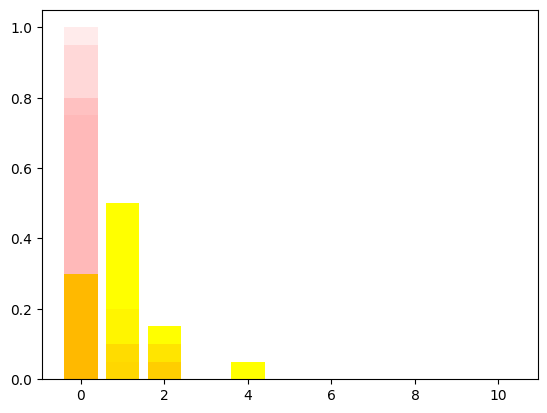

In [3]:
from CNOTCircuit import CNOTCircuit,transversal_circuit,random_circuit, local_connected_circuit
import matplotlib.pyplot as plt


expectation_list=[]
std_list=[]

expectation_list_local=[]
std_list_local=[]

circuit0=CNOTCircuit(10,10,0.01)
circuit0.construct_all()
dis0=circuit0.calculate_distribution_sample(20)
keys = list(dis0.keys())
values = list(dis0.values())

refexp,refstd=circuit0.get_expectation_and_std()



circuitfinal=CNOTCircuit(10,500,0.01)
circuitfinal.construct_all()
dis1=circuitfinal.calculate_distribution_sample(20)
keys = list(dis0.keys())
values = list(dis0.values())

finalexp,finalstd=circuitfinal.get_expectation_and_std()




plt.bar(keys, values, color=(1, 1, 0, 1), label="Reference")


#gnum_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

gnum_list=[1,2,3,4,5]


for gnum in gnum_list:
    print(gnum)
    circuit=local_connected_circuit(10,10,gnum,0.01)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(20)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list_local.append(tmpexp)
    std_list_local.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())

    # Normalize T to a value between 0 and 1 for the alpha
    alpha = gnum / max(gnum_list)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'gnum={gnum}')



for gnum in gnum_list:
    print(gnum)
    circuit=random_circuit(10,10,gnum,0.01)
    circuit.construct_all()
    dis = circuit.calculate_distribution_sample(20)
    tmpexp,tmpstd=circuit.get_expectation_and_std()
    expectation_list.append(tmpexp)
    std_list.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())

    # Normalize T to a value between 0 and 1 for the alpha
    alpha = gnum / max(gnum_list)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'gnum={gnum}')





plt.xlabel('Number of errors')
plt.ylabel('Probability')
plt.title('Distribution of error numbers')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()

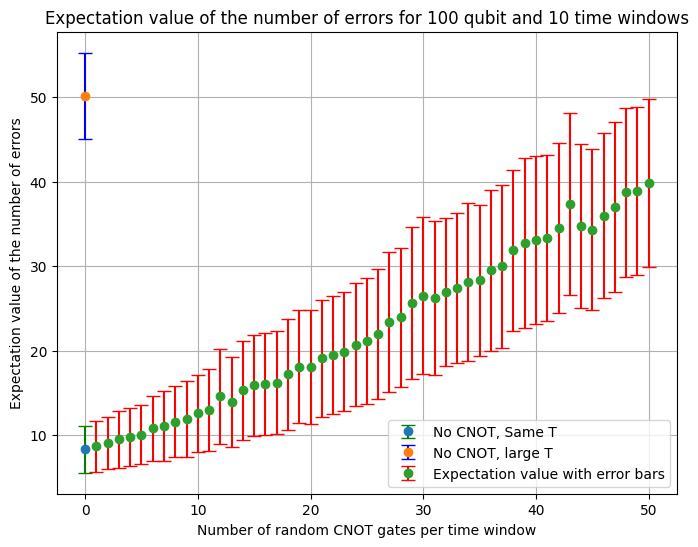

In [5]:

plt.figure(figsize=(8, 6))



plt.errorbar(0,refexp,refstd,fmt='o', ecolor='green', capsize=5, label='No CNOT, Same T')
plt.errorbar(0,finalexp,finalstd,fmt='o', ecolor='blue', capsize=5, label='No CNOT, large T')

# Plot the expectation values with error bars
plt.errorbar(gnum_list, expectation_list, yerr=std_list, fmt='o', ecolor='red', capsize=5, label='Expectation value with error bars')

plt.xlabel('Number of random CNOT gates per time window')
plt.ylabel('Expectation value of the number of errors')
plt.title('Expectation value of the number of errors for 100 qubit and 10 time windows')
plt.legend()
plt.grid(True)
plt.savefig("RandomCNOT.png")
plt.show()

In [1]:
%matplotlib inline

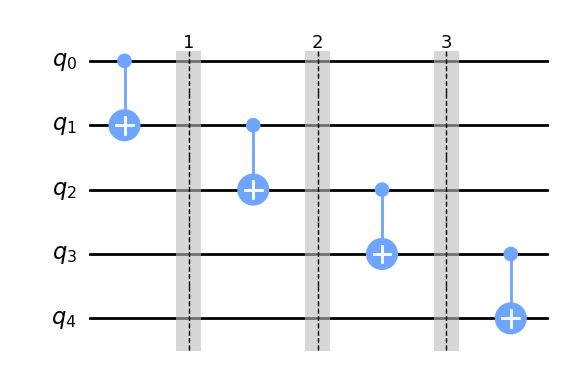

In [2]:
from CNOTCircuit import CNOTCircuit


circuit=CNOTCircuit(5,3,0.01)
circuit.add_CNOT(0,1,0)
circuit.add_CNOT(1,2,1)
circuit.add_CNOT(2,3,2)
circuit.add_CNOT(3,4,3)
circuit.construct_all()
circuit.show_circuit()
circuit._qiskitcircuit.draw(output="mpl")

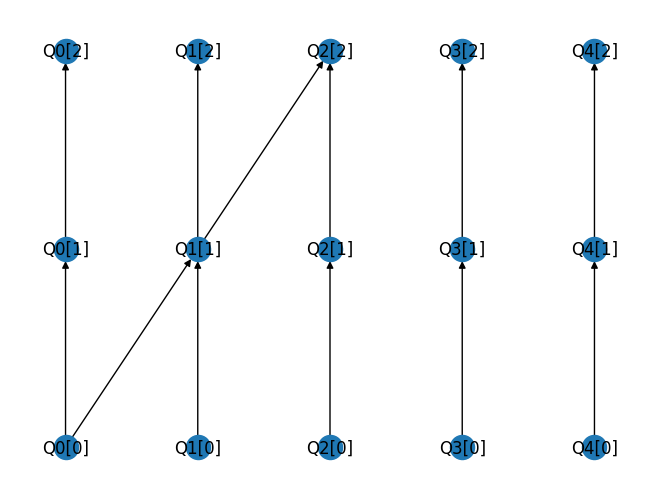

In [3]:
circuit.show_EPSTG()

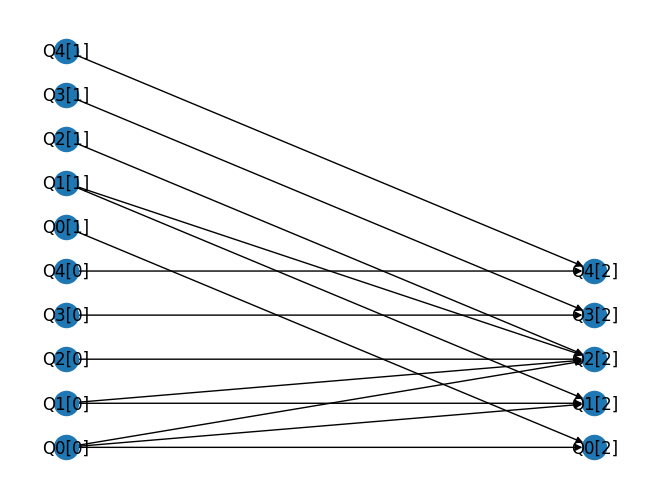

In [4]:
circuit.show_RSG()

In [5]:
circuit.show_matrix()

[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]]


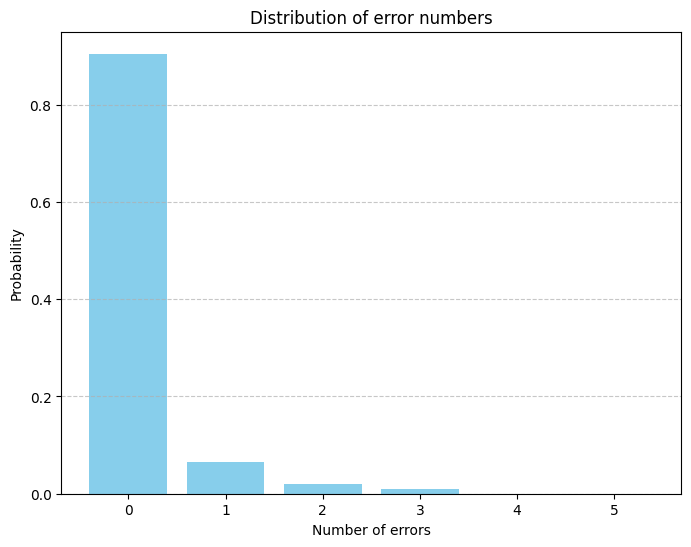

In [6]:
circuit.calculate_distribution_exact()
circuit.show_distribution()

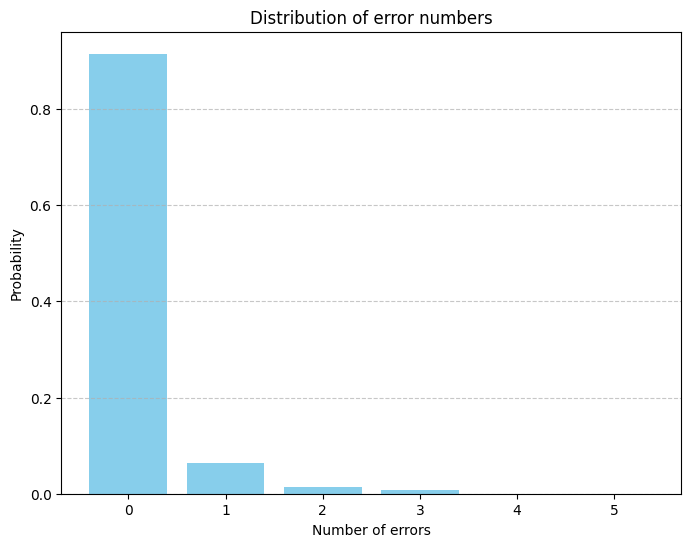

In [7]:
circuit.calculate_distribution_sample(1000)
circuit.show_distribution()

In [8]:
import numpy as np

In [9]:
circuit.calculate_entropy()
print(circuit._entropy)

0.5095312472412259


In [11]:
print(circuit._entropy)

0.5095312472412259


In [10]:
circuit._dist.values()

dict_values([0.915, 0.063, 0.015, 0.007, 0.0, 0.0])

In [2]:
np.log(3)

1.0986122886681098

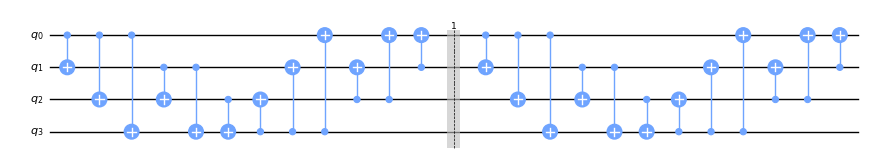

In [1]:
from CNOTCircuit import CNOTCircuit,transversal_circuit,random_circuit,fully_connected_circuit


n_qubits=4
T=3
p=0.1
circuit=fully_connected_circuit(n_qubits,T,p)
circuit.construct_all()
circuit.show_circuit()
circuit._qiskitcircuit.draw(output='mpl',scale=0.5)

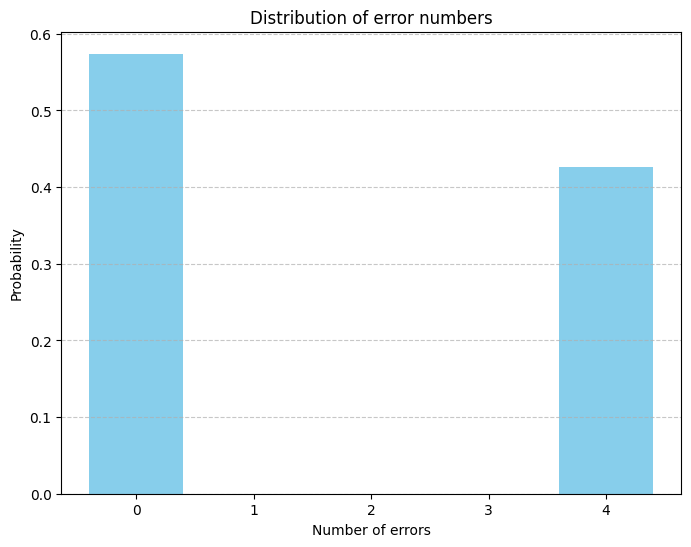

In [2]:
circuit.calculate_distribution_sample(2000)
circuit.show_distribution()

In [3]:
circuit.show_matrix()

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [4]:
circuit._gateList

[(0, 1, 0),
 (0, 2, 0),
 (0, 3, 0),
 (1, 2, 0),
 (1, 3, 0),
 (2, 3, 0),
 (3, 2, 0),
 (3, 1, 0),
 (3, 0, 0),
 (2, 1, 0),
 (2, 0, 0),
 (1, 0, 0),
 (0, 1, 1),
 (0, 2, 1),
 (0, 3, 1),
 (1, 2, 1),
 (1, 3, 1),
 (2, 3, 1),
 (3, 2, 1),
 (3, 1, 1),
 (3, 0, 1),
 (2, 1, 1),
 (2, 0, 1),
 (1, 0, 1)]

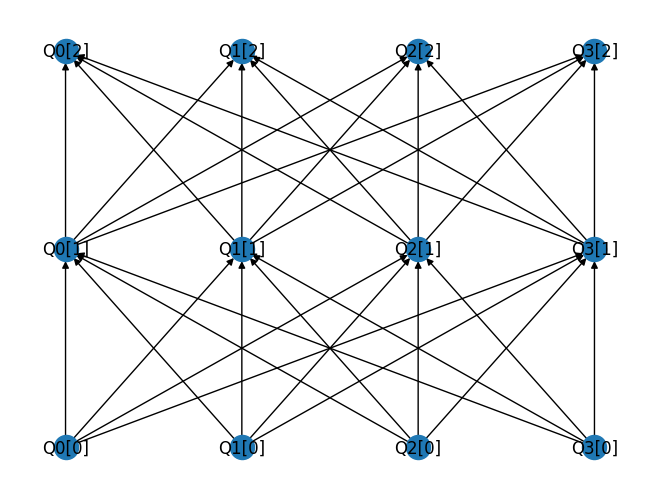

In [5]:
circuit.show_EPSTG()

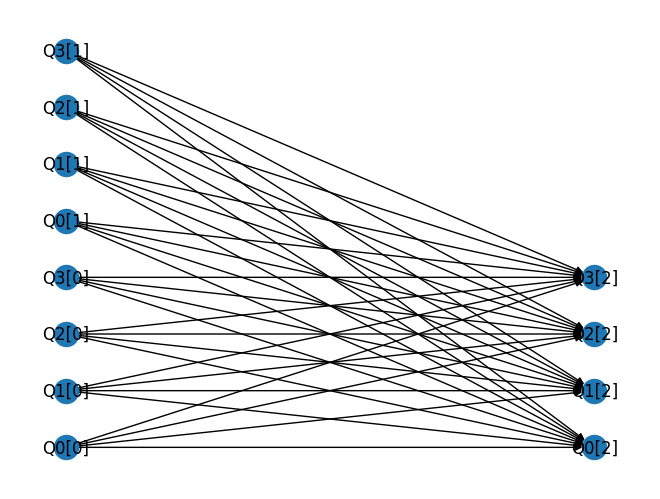

In [6]:
circuit.show_RSG()

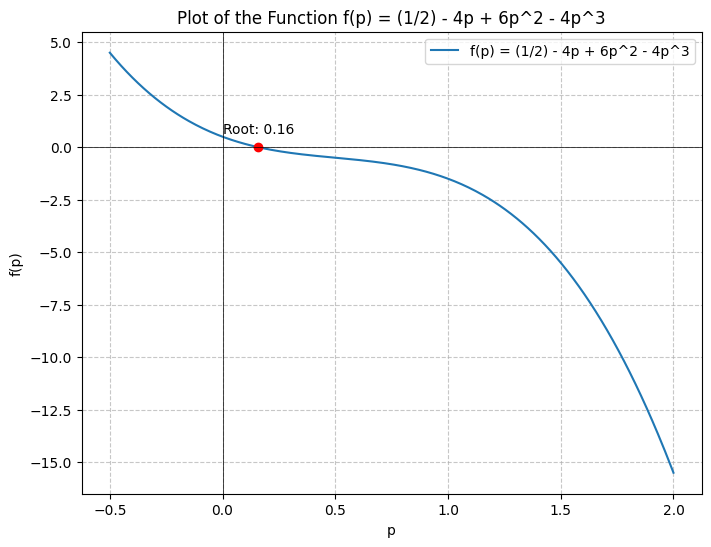

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve

# Define the function
p = symbols('p')
function = (1/2) - 4*p + 6*p**2 - 4*p**3

# Solve for roots
roots = solve(function, p)

# Separate real roots from complex ones
real_roots = [root.evalf() for root in roots if root.is_real]

# Generate x values for plotting
x = np.linspace(-0.5, 2, 400)
# Compute y values
y = (1/2) - 4*x + 6*x**2 - 4*x**3

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(p) = (1/2) - 4p + 6p^2 - 4p^3')

# Annotate the real roots
for root in real_roots:
    plt.annotate(f'Root: {root:.2f}', (root, 0), textcoords="offset points", xytext=(0,10), ha='center')
    plt.plot(root, 0, 'ro')  # Mark roots on the plot

# Add grid, title, and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Plot of the Function f(p) = (1/2) - 4p + 6p^2 - 4p^3')
plt.xlabel('p')
plt.ylabel('f(p)')
plt.legend()

plt.show()

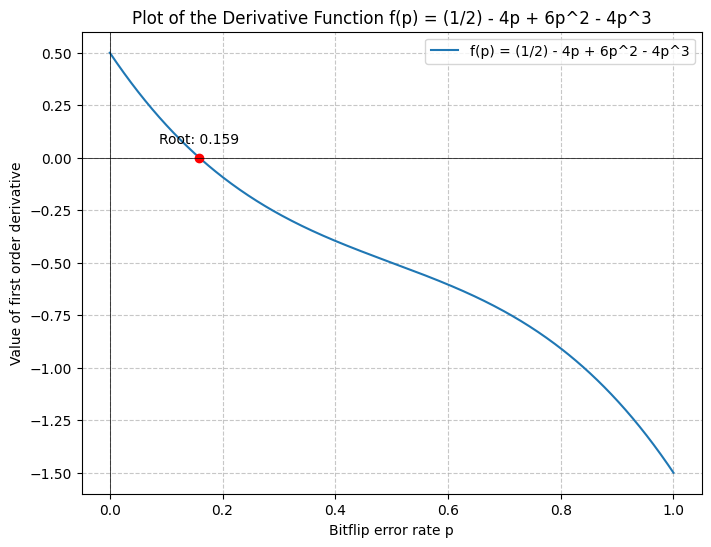

In [8]:
# Generate x values for plotting within the specified range
x = np.linspace(0, 1, 400)
# Compute y values
y = (1/2) - 4*x + 6*x**2 - 4*x**3

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(p) = (1/2) - 4p + 6p^2 - 4p^3')

# Annotate the real roots within the range [0, 1]
for root in real_roots:
    if 0 <= root <= 1:
        plt.annotate(f'Root: {root:.3f}', (root, 0), textcoords="offset points", xytext=(0,10), ha='center')
        plt.plot(root, 0, 'ro')  # Mark roots on the plot

# Add grid, title, and labels
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Plot of the Derivative Function f(p) = (1/2) - 4p + 6p^2 - 4p^3')
plt.xlabel('Bitflip error rate p')
plt.ylabel('Value of first order derivative')
plt.legend()
plt.savefig("Derivative.png")
plt.show()

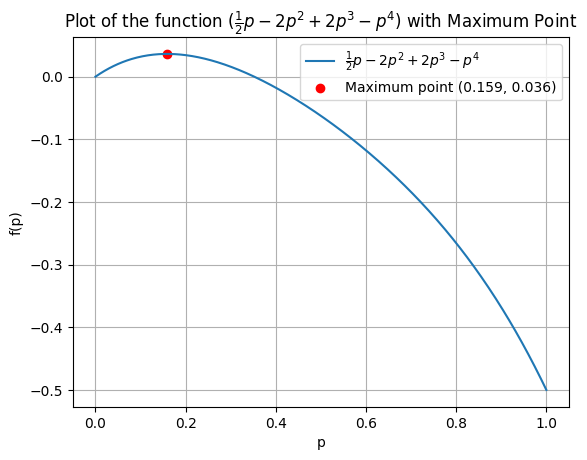

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the updated function
def f(p):
    return (1/2)*p - 2*p**2 + 2*p**3 - p**4

# Define the range of p from 0 to 1
p = np.linspace(0, 1, 500)
f_values = f(p)

# Find the maximum point using scipy's minimize_scalar with a negative function to maximize
result = minimize_scalar(lambda p: -f(p), bounds=(0, 1), method='bounded')

# Extract the maximum point
p_max = result.x
f_max = f(p_max)

# Plot the function
plt.plot(p, f_values, label=r"$\frac{1}{2}p - 2p^2 + 2p^3 - p^4$")
plt.scatter(p_max, f_max, color='red', label=f'Maximum point ({p_max:.3f}, {f_max:.3f})')
plt.xlabel('p')
plt.ylabel('f(p)')
plt.title('Plot of the function $(\\frac{1}{2}p - 2p^2 + 2p^3 - p^4)$ with Maximum Point')
plt.grid(True)
plt.legend()
plt.show()


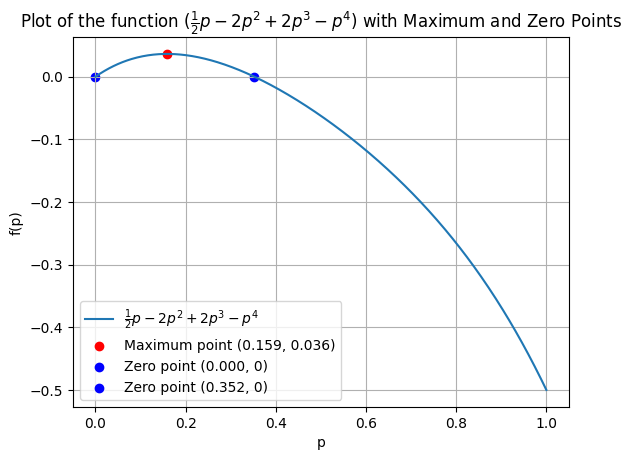

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, root_scalar

# Define the updated function
def f(p):
    return (1/2)*p - 2*p**2 + 2*p**3 - p**4

# Define the range of p from 0 to 1
p = np.linspace(0, 1, 500)
f_values = f(p)

# Find the maximum point using scipy's minimize_scalar with a negative function to maximize
result_max = minimize_scalar(lambda p: -f(p), bounds=(0, 1), method='bounded')

# Extract the maximum point
p_max = result_max.x
f_max = f(p_max)

# Find zero points using root_scalar within the range [0, 1]
roots = []
# Try different initial guesses to find all roots within the interval [0, 1]
for guess in np.linspace(0, 1, 5):
    try:
        root_result = root_scalar(f, bracket=[guess, guess + 0.2], method='brentq')
        if root_result.converged and 0 <= root_result.root <= 1:
            roots.append(root_result.root)
    except ValueError:
        # If the root finding fails within the bracket, skip it
        continue

# Plot the function
plt.plot(p, f_values, label=r"$\frac{1}{2}p - 2p^2 + 2p^3 - p^4$")
plt.scatter(p_max, f_max, color='red', label=f'Maximum point ({p_max:.3f}, {f_max:.3f})')

# Plot the zero points
for root in roots:
    plt.scatter(root, 0, color='blue', label=f'Zero point ({root:.3f}, 0)')

plt.xlabel('p')
plt.ylabel('f(p)')
plt.title('Plot of the function $(\\frac{1}{2}p - 2p^2 + 2p^3 - p^4)$ with Maximum and Zero Points')
plt.grid(True)
plt.legend(loc='best')
plt.savefig("Fp.png")
plt.show()


In [5]:
circuit._gateList

[(0, 5, 0), (1, 6, 0), (2, 7, 0), (3, 8, 1), (4, 9, 1)]

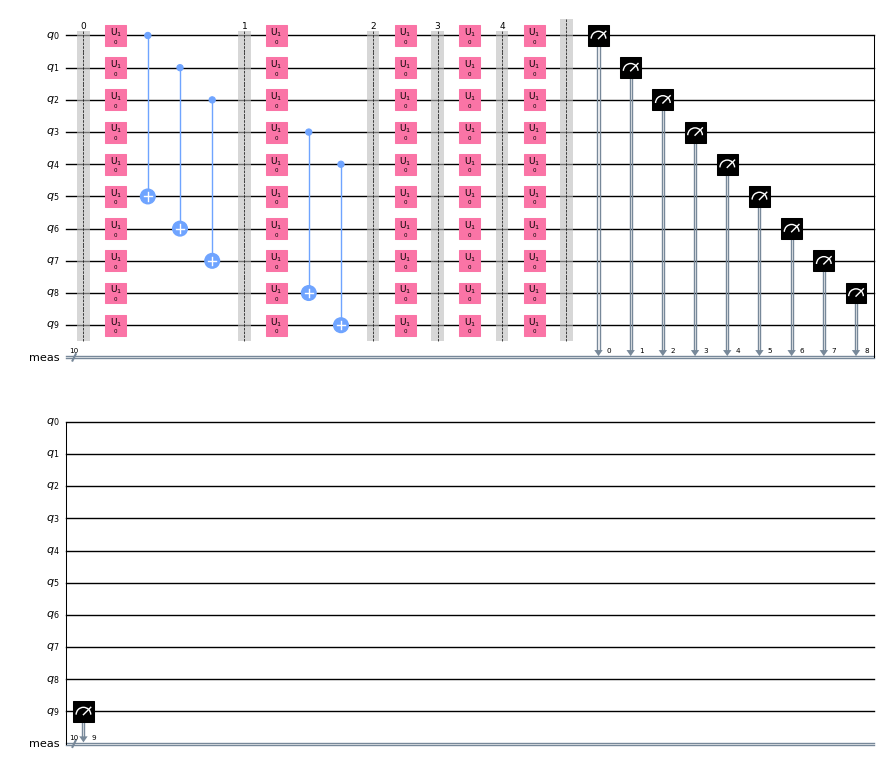

In [4]:
from CNOTCircuit import CNOTCircuit,transversal_circuit,random_circuit,fully_connected_circuit


n_qubits=4
T=3
p=0.1

circuit = transversal_circuit(10, 5, 3, 0.01)
circuit._put_u1_gate=True
circuit.construct_all()
circuit.show_circuit()
circuit._qiskitcircuit.draw(output='mpl',scale=0.5)

In [2]:
qiskit_dist=circuit.run_qiskit(shots=100)

In [3]:
qiskit_dist

{0: 68, 1: 29, 2: 3, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}

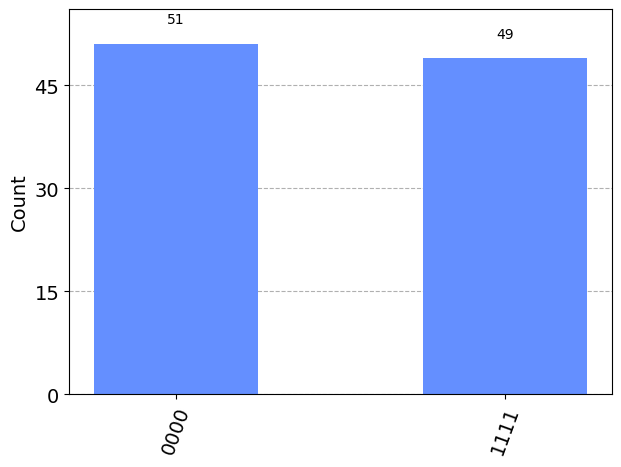

In [ ]:
# Ideal simulator and execution
sim_ideal = AerSimulator(shots=100)
result_ideal = sim_ideal.run(circ).result()
plot_histogram(result_ideal.get_counts(0))

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from CNOTCircuit import CNOTCircuit,transversal_circuit,random_circuit,fully_connected_circuit

2
6
10
14
18
22
26
30
2
6
10
14
18
22
26
30
2
6
10
14
18
22
26
30


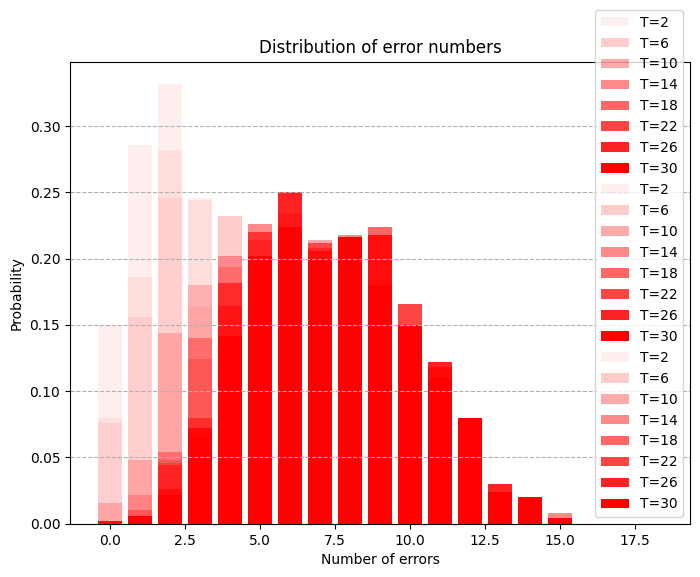

In [14]:
Tlist=[2,6,10,14,18,22,26,30]
plt.figure(figsize=(8, 6))
expectation_list_12=[]
entropy_list_12=[]
std_list_12=[]
expectation_list_16=[]
entropy_list_16=[]
std_list_16=[]
expectation_list_18=[]
entropy_list_18=[]
std_list_18=[]


for T in Tlist:
    print(T)
    circuit = CNOTCircuit(12, T, 0.08)
    circuit.construct_all()
    dis = circuit.run_qiskit(shots=500)
    tmpexp,tmpstd=circuit.get_expectation_and_std_qiskit()
    expectation_list_12.append(tmpexp)
    entropy_list_12.append(circuit.calculate_entropy_qiskit())
    std_list_12.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())
    # Normalize T to a value between 0 and 1 for the alpha
    alpha = T / max(Tlist)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'T={T}')


for T in Tlist:
    print(T)
    circuit = CNOTCircuit(16, T, 0.08)
    circuit.construct_all()
    dis = circuit.run_qiskit(shots=500)
    tmpexp,tmpstd=circuit.get_expectation_and_std_qiskit()
    expectation_list_16.append(tmpexp)
    entropy_list_16.append(circuit.calculate_entropy_qiskit())
    std_list_16.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())
    # Normalize T to a value between 0 and 1 for the alpha
    alpha = T / max(Tlist)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'T={T}')



for T in Tlist:
    print(T)
    circuit = CNOTCircuit(18, T, 0.08)
    circuit.construct_all()
    dis = circuit.run_qiskit(shots=500)
    tmpexp,tmpstd=circuit.get_expectation_and_std_qiskit()
    expectation_list_18.append(tmpexp)
    entropy_list_18.append(circuit.calculate_entropy_qiskit())
    std_list_18.append(tmpstd) 
    keys = list(dis.keys())
    values = list(dis.values())
    # Normalize T to a value between 0 and 1 for the alpha
    alpha = T / max(Tlist)
    plt.bar(keys, values, color=(1, 0, 0, alpha), label=f'T={T}')



plt.grid(axis='y', linestyle='--', alpha=T/max(Tlist))
plt.xlabel('Number of errors')
plt.ylabel('Probability')
plt.title('Distribution of error numbers')
plt.legend()
plt.show()

In [8]:
Tlist

[2, 4, 6, 8, 10]

In [9]:
expectation_list_60

[0.23, 0.41, 0.86, 1.03, 1.3300000000000003]

In [10]:
std_list_60

[0.4208325082500163,
 0.6015812497078014,
 0.8487638069569178,
 1.0045396955820112,
 1.0775435026020987]

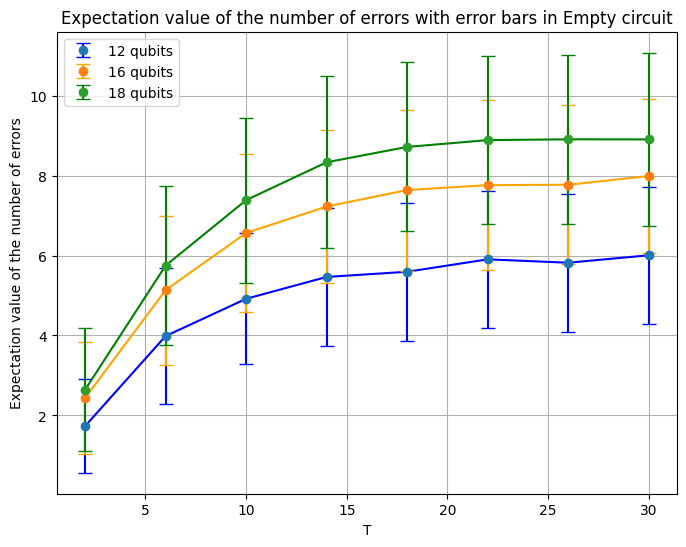

In [20]:

plt.figure(figsize=(8, 6))

# Plot the expectation values with error bars
plt.errorbar(Tlist, expectation_list_12, yerr=std_list_12, fmt='o', ecolor='blue', capsize=5, label='12 qubits')
plt.plot(Tlist, expectation_list_12, color='blue')

plt.errorbar(Tlist, expectation_list_16, yerr=std_list_16, fmt='o', ecolor='orange', capsize=5, label='16 qubits')
plt.plot(Tlist, expectation_list_16, color='orange')
plt.errorbar(Tlist, expectation_list_18, yerr=std_list_18, fmt='o', ecolor='green', capsize=5, label='18 qubits')
plt.plot(Tlist, expectation_list_18, color='green')
plt.xlabel('T')
plt.ylabel('Expectation value of the number of errors')
plt.title('Expectation value of the number of errors with error bars in Empty circuit')
plt.legend()
plt.grid(True)
plt.savefig('expErrorEmpty.png', dpi=300)  # 'my_plot.png' is the filename, 'dpi=300' sets the resolution
plt.savefig("EmptyCircuitqiskit.png")
plt.show()

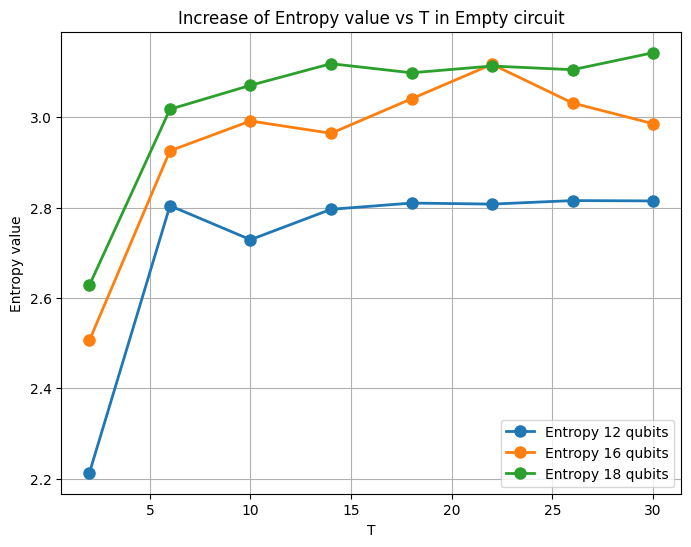

In [21]:

plt.figure(figsize=(8, 6))

# Plot the expectation values with error bars

plt.plot(Tlist, entropy_list_12, marker='o', linestyle='-', markersize=8, linewidth=2, label='Entropy 12 qubits')

plt.plot(Tlist, entropy_list_16, marker='o', linestyle='-', markersize=8, linewidth=2, label='Entropy 16 qubits')

plt.plot(Tlist, entropy_list_18, marker='o', linestyle='-', markersize=8, linewidth=2, label='Entropy 18 qubits')


plt.xlabel('T')
plt.ylabel('Entropy value')
plt.title('Increase of Entropy value vs T in Empty circuit')
plt.legend()
plt.grid(True)
plt.savefig('entropy.png', dpi=300)  # 'my_plot.png' is the filename, 'dpi=300' sets the resolution
plt.savefig("EmptyCircuitqiskitEntropy.png")
plt.show()

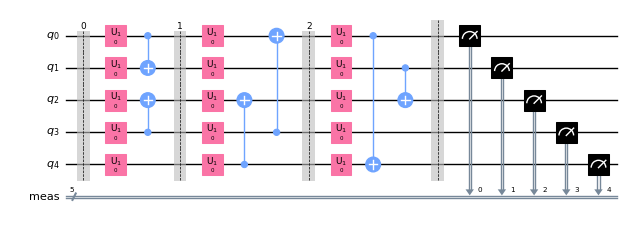

In [1]:
from CNOTCircuit import random_circuit



circuit=random_circuit(5,3,2,0.01)
circuit.construct_all()
circuit.show_circuit("RandomCircuit.png")
circuit._qiskitcircuit.draw(output='mpl',scale=0.5)

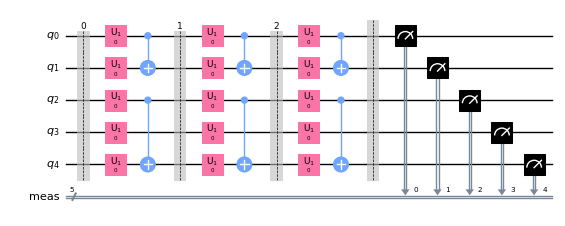

In [1]:
from CNOTCircuit import random_circuit, local_connected_circuit



circuit=local_connected_circuit(5,3,2,0.01)
circuit.construct_all()
#circuit.show_circuit("RandomCircuit.png")
circuit._qiskitcircuit.draw(output='mpl',scale=0.5)